In [1]:
import sys
import numpy as np
sys.path.append("../src")
import torch

/home/steinad/anaconda3/envs/selec/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_set = torch.load("/data5/steinad/aaai23/run3/logs_toy_biased_0.45_lr_0.2_batchsize_128_basemodel/cached_train_set")
test_set = torch.load("/data5/steinad/aaai23/run3/logs_toy_biased_0.45_lr_0.2_batchsize_128_basemodel/cached_test_set")
train_clean_labels = torch.load("/data5/steinad/aaai23/run3/logs_toy_biased_0.45_lr_0.2_batchsize_128_basemodel/cached_train_origin_labels")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
2022-11-28 22:06:29.995556: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-28 22:06:29.995585: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
num_pos = torch.sum(train_set.targets == 1)
num_neg = torch.sum(train_set.targets == 0)
print(num_pos / (num_pos + num_neg))

num_pos = np.sum(train_clean_labels == 1)
num_neg = np.sum(train_clean_labels == 0)
print(num_pos / (num_pos + num_neg))

tensor(0.5150)
0.5183333333333333


0.9125


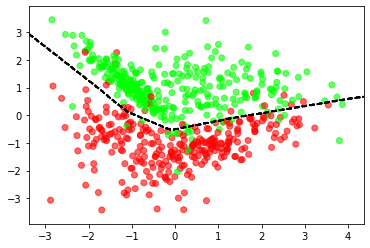

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
cmap = ListedColormap([[1,0,0], [0, 1, 0]])
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(10, 10)).fit(train_set.data, train_clean_labels)
print(clf.score(test_set.data, test_set.targets))

# create a mesh to plot in
X = train_set.data
Y = train_set.targets

h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z2 = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
plt.contour(xx, yy, Z2, linestyles='dashed', colors="black")
plt.scatter(train_set.data[:,0], train_set.data[:,1], c=train_clean_labels, cmap=cmap, alpha=0.6)
plt.show()

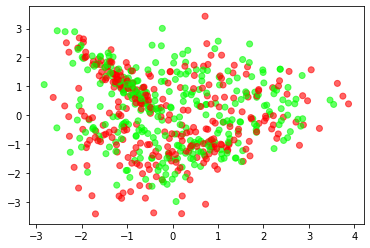

In [9]:
plt.scatter(train_set.data[:,0], train_set.data[:,1], c=train_set.targets, cmap=cmap, alpha=0.6)
plt.show()

0.51010101010101
[[-2.8433504   3.4543571 ]
 [ 0.14650914 -3.4620047 ]
 [-2.4853818  -1.1979879 ]
 [ 1.2615203  -0.8131898 ]
 [ 0.9919744  -0.62200475]
 [-1.1408602   1.3681597 ]]


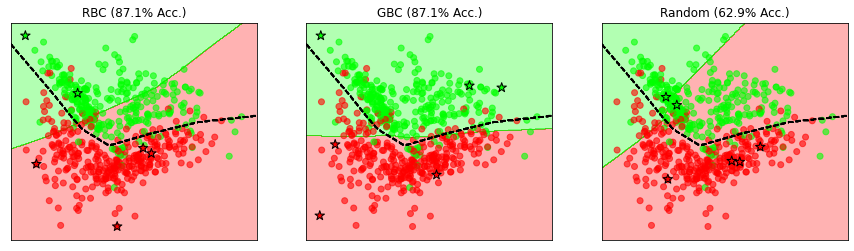

In [3]:
from matplotlib.colors import ListedColormap
from models.toynet import ToyNN
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import copy


colors = {0: (1., 0., 0.), 1: (0., 1., 0.)}
cmap = ListedColormap([[1,0,0], [0,1,0]])

train_set = torch.load("/data5/steinad/aaai23/run4/logs_toy_ours2_biased_0.60_lr_0.1_pretrained_select_2_3_3/cached_train_set")
orig_train_set = train_set
train_clean_labels = torch.load("/data5/steinad/aaai23/run4/logs_toy_ours2_biased_0.60_lr_0.1_pretrained_select_2_3_3/cached_train_origin_labels")

num_pos = np.sum(train_set.targets == 1)
num_neg = np.sum(train_set.targets == 0)
print(num_pos / (num_pos + num_neg))

clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(10, 10)).fit(train_set.data, train_clean_labels)


meta_set = torch.load("/data5/steinad/aaai23/run4/logs_toy_ours1_biased_0.60_lr_0.1_pretrained_select_2_3_3/cached_meta_set")
print(meta_set.data)
model = ToyNN()
model_state = torch.load("/data5/steinad/aaai23/run4/logs_toy_ours1_biased_0.60_lr_0.1_pretrained_select_2_3_3/cached_model")
model.load_state_dict(model_state)

h = 0.02
# create a mesh to plot in
X = train_set.data
Y = train_set.targets

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
Z2 = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = torch.argmax(Z, dim=1)
Z = Z.reshape(xx.shape)
Z2 = Z2.reshape(xx.shape)
ax1.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
ax1.contour(xx, yy, Z2, linestyles='dashed', colors="black")
ax1.scatter(train_set.data[:,0], train_set.data[:,1], c=[colors[l] for l in train_clean_labels], alpha=0.6, cmap=cmap)
ax1.scatter(meta_set.data[:,0], meta_set.data[:,1], c=[colors[l] for l in meta_set.targets], marker="*", s=100, cmap=cmap, edgecolors="black")
ax1.set_title("RBC (73.3% Acc.)")

# ----
# train_set = torch.load("/data5/steinad/aaai23/run3/logs_toy_ours2_biased_0.45_lr_0.1_pretrained_select_2_3_3/cached_train_set")
# train_clean_labels = torch.load("/data5/steinad/aaai23/run3/logs_toy_ours2_biased_0.45_lr_0.1_pretrained_select_2_3_3/cached_train_origin_labels")

meta_set = torch.load("/data5/steinad/aaai23/run4/logs_toy_ours2_biased_0.60_lr_0.1_pretrained_select_2_3_3/cached_meta_set")
model = ToyNN()
model_state = torch.load("/data5/steinad/aaai23/run4/logs_toy_ours2_biased_0.60_lr_0.1_pretrained_select_2_3_3/cached_model")
model.load_state_dict(model_state)

h = 0.02
# create a mesh to plot in
X = train_set.data
Y = train_set.targets

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
Z = torch.argmax(Z, dim=1)
Z = Z.reshape(xx.shape)
ax2.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
ax2.contour(xx, yy, Z2, linestyles='dashed', colors="black")
ax2.scatter(train_set.data[:,0], train_set.data[:,1], c=[colors[l] for l in train_clean_labels], alpha=0.6, cmap=cmap)
ax2.scatter(meta_set.data[:,0], meta_set.data[:,1], c=[colors[l] for l in meta_set.targets], marker="*", s=100, cmap=cmap, edgecolors="black")
ax2.set_title("GBC (92.0% Acc.)")

# ----
# train_set = torch.load("/data5/steinad/aaai23/run3/logs_toy_random_biased_0.45_lr_0.1_pretrained_select_2_3_3/cached_train_set")
# train_clean_labels = torch.load("/data5/steinad/aaai23/run3/logs_toy_random_biased_0.45_lr_0.1_pretrained_select_2_3_3/cached_train_origin_labels")

meta_set = torch.load("/data5/steinad/aaai23/run4/logs_toy_random_biased_0.60_lr_0.1_pretrained_select_2_3_3/cached_meta_set")
# print(meta_set_ids)
# meta_set = copy.deepcopy(orig_train_set)
# meta_set.data = meta_set.data[meta_set_ids,:]
# meta_set.targets = meta_set.targets[meta_set_ids]
model = ToyNN()
model_state = torch.load("/data5/steinad/aaai23/run4/logs_toy_random_biased_0.60_lr_0.1_pretrained_select_2_3_3/cached_model")
model.load_state_dict(model_state)

h = 0.02
# create a mesh to plot in
X = train_set.data
Y = train_set.targets

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
Z = torch.argmax(Z, dim=1)
Z = Z.reshape(xx.shape)
ax3.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
ax3.contour(xx, yy, Z2, linestyles='dashed', colors="black")
ax3.scatter(train_set.data[:,0], train_set.data[:,1], c=[colors[l] for l in train_clean_labels], alpha=0.6, cmap=cmap)
ax3.scatter(meta_set.data[:,0], meta_set.data[:,1], c=[colors[l] for l in meta_set.targets], marker="*", s=100, cmap=cmap, edgecolors="black")
ax3.set_title("Random (56.3% Acc.)")

fig.set_figwidth(15)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
fig.savefig("toy_decision_boundaries.pdf", bbox_inches="tight")

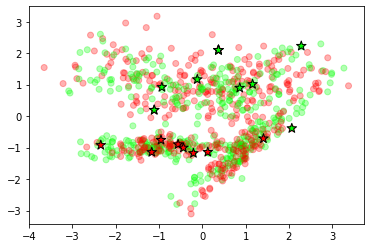

In [26]:
meta_set = torch.load("/data5/steinad/aaai22/logs_toy_ours2_biased_0.6_lr_0.001_pretrained_select_20_1_1/cached_meta_set")
plt.scatter(train_set.data[:,0], train_set.data[:,1], c=train_set.targets, alpha=0.3, cmap=cmap)
plt.scatter(meta_set.data[:,0], meta_set.data[:,1], c=meta_set.targets, marker="*", s=100, cmap=cmap, edgecolors="black")
plt.show()

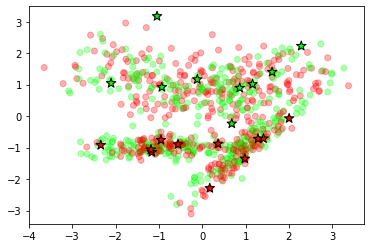

In [23]:
meta_set = torch.load("/data5/steinad/aaai22/logs_toy_random_biased_0.6_lr_0.001_pretrained_select_20_1_1/cached_meta_set")
plt.scatter(train_set.data[:,0], train_set.data[:,1], c=train_set.targets, alpha=0.3, cmap=cmap)
plt.scatter(meta_set.data[:,0], meta_set.data[:,1], c=meta_set.targets, marker="*", s=100, cmap=cmap, edgecolors="black")
plt.show()